# Import Libraries

In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Tue Mar 17 01:14:58 2020


In [2]:
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
# import src.preprocessing.pytorchtransforms as preprocessing
import src.preprocessing.albumentationstransforms as preprocessing
import src.utils.utils as utils
import src.models.train_model as train
import src.visualization.plotdata as plotdata
import src.preprocessing.customcompose as customcompose

%config IPCompleter.greedy=True
%reload_ext autoreload


In [3]:
%autoreload 2  # Autoreload all modules

In [4]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)

In [5]:
def showsysteminfo():
    from psutil import virtual_memory
    ram_gb = virtual_memory().total / 1e9
    print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

    if ram_gb < 20:
      print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
      print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
      print('re-execute this cell.')
    else:
      print('You are using a high-RAM runtime!')

In [6]:
import torch
print(torch.__version__)

1.4.0


In [7]:
# mean,std= utils.Utils.calculatemeanandstddeviation()
# print("mean: " + str(mean))
# print("std: " + str(std))
mean=[0.5,0.5,0.5]
std=[0.5,0.5,0.5]
preproc = preprocessing.AlbumentaionsTransforms()
train_transforms = preproc.gettraintransforms(mean,std)
test_transforms = preproc.gettesttransforms(mean,std)
compose_train = customcompose.CustomCompose(train_transforms)
compose_test = customcompose.CustomCompose(test_transforms)

In [8]:
ds = dst.Dataset()
train_dataset = ds.gettraindataset(compose_train)
test_dataset = ds.gettestdataset(compose_test)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
batch_size = 128
dataloader = dl.Cifar10Dataloader(traindataset=train_dataset, testdataset=test_dataset,batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

CUDA Available? True
128


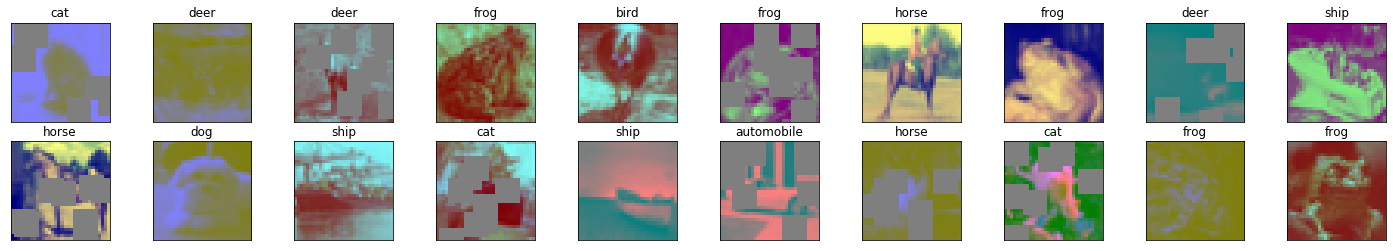

In [10]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

#TODO show transformed images fom dataset
dataiterator = iter(train_loader)
plotdata.PlotData.showImagesfromdataset(dataiterator,classes=classes)

In [11]:
cnn_model, device = utils.Utils.createmodelresnet18()
train_model = train.TrainModel()
train_model.showmodelsummary(cnn_model)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [12]:
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.005, momentum=0.9, weight_decay=0)
# scheduler = utils.Utils.createscheduler(optimizer, mode='max', factor=0.1, patience=4,
#                                         verbose=True)
# scheduler = utils.Utils.createschedulersteplr(optimizer, step_size=5, gamma=0.1)

In [13]:
lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 25
for epoch in range(1, epochs+1):
    print("EPOCH:", epoch)
    train_model.train(cnn_model, device, train_loader, optimizer, 1)
    t_acc_epoch = train_model.test(cnn_model, device, test_loader, class_correct=class_correct,
                                   class_total=class_total, epoch=epoch)
#     scheduler.step(epoch)
#     for param_groups in optimizer.param_groups:
#         print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
#         lr_data.append(param_groups['lr'])

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


/home/abhijit/.virtualenvs/dl4cv/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Loss=1.4954750537872314 Batch_id=390 Accuracy=36.85: 100%|██████████| 391/391 [01:02<00:00,  6.25it/s]



Test set: Average loss: 0.0113, Accuracy: 4909/10000 (49.09%)

Validation accuracy increased (0.000000 --> 49.090000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.0928953886032104 Batch_id=390 Accuracy=54.22: 100%|██████████| 391/391 [01:32<00:00,  4.24it/s]



Test set: Average loss: 0.0082, Accuracy: 6373/10000 (63.73%)

Validation accuracy increased (49.090000 --> 63.730000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 3


Loss=0.8019514083862305 Batch_id=390 Accuracy=63.87: 100%|██████████| 391/391 [01:37<00:00,  4.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 6154/10000 (61.54%)

EPOCH: 4


Loss=0.8602989912033081 Batch_id=390 Accuracy=69.20: 100%|██████████| 391/391 [01:40<00:00,  3.89it/s]



Test set: Average loss: 0.0065, Accuracy: 7134/10000 (71.34%)

Validation accuracy increased (63.730000 --> 71.340000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 5


Loss=0.9746075868606567 Batch_id=390 Accuracy=73.35: 100%|██████████| 391/391 [01:37<00:00,  4.00it/s]



Test set: Average loss: 0.0059, Accuracy: 7501/10000 (75.01%)

Validation accuracy increased (71.340000 --> 75.010000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 6


Loss=0.5789049863815308 Batch_id=390 Accuracy=76.16: 100%|██████████| 391/391 [01:38<00:00,  3.98it/s] 



Test set: Average loss: 0.0057, Accuracy: 7600/10000 (76.00%)

Validation accuracy increased (75.010000 --> 76.000000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 7


Loss=0.7119408845901489 Batch_id=390 Accuracy=78.79: 100%|██████████| 391/391 [01:40<00:00,  3.89it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7525/10000 (75.25%)

EPOCH: 8


Loss=0.7526558041572571 Batch_id=390 Accuracy=80.85: 100%|██████████| 391/391 [01:40<00:00,  3.89it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7491/10000 (74.91%)

EPOCH: 9


Loss=0.4181838035583496 Batch_id=390 Accuracy=82.99: 100%|██████████| 391/391 [01:41<00:00,  3.84it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7548/10000 (75.48%)

EPOCH: 10


Loss=0.3193398118019104 Batch_id=390 Accuracy=84.21: 100%|██████████| 391/391 [01:43<00:00,  3.77it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7559/10000 (75.59%)

EPOCH: 11


Loss=0.4332408308982849 Batch_id=390 Accuracy=85.90: 100%|██████████| 391/391 [01:43<00:00,  3.76it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 7577/10000 (75.77%)

EPOCH: 12


Loss=0.5277630090713501 Batch_id=390 Accuracy=87.31: 100%|██████████| 391/391 [01:39<00:00,  3.93it/s] 



Test set: Average loss: 0.0058, Accuracy: 7864/10000 (78.64%)

Validation accuracy increased (76.000000 --> 78.640000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 13


Loss=0.26103535294532776 Batch_id=390 Accuracy=88.10: 100%|██████████| 391/391 [01:42<00:00,  3.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7848/10000 (78.48%)

EPOCH: 14


Loss=0.29082661867141724 Batch_id=390 Accuracy=89.03: 100%|██████████| 391/391 [01:41<00:00,  3.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 7589/10000 (75.89%)

EPOCH: 15


Loss=0.24308648705482483 Batch_id=390 Accuracy=89.57: 100%|██████████| 391/391 [01:40<00:00,  3.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 7647/10000 (76.47%)

EPOCH: 16


Loss=0.3232274651527405 Batch_id=390 Accuracy=90.44: 100%|██████████| 391/391 [01:41<00:00,  3.83it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 7701/10000 (77.01%)

EPOCH: 17


Loss=0.3022387623786926 Batch_id=390 Accuracy=91.06: 100%|██████████| 391/391 [01:39<00:00,  3.92it/s] 



Test set: Average loss: 0.0064, Accuracy: 7957/10000 (79.57%)

Validation accuracy increased (78.640000 --> 79.570000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 18


Loss=0.21169976890087128 Batch_id=390 Accuracy=91.34: 100%|██████████| 391/391 [01:38<00:00,  3.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 7764/10000 (77.64%)

EPOCH: 19


Loss=0.27160078287124634 Batch_id=390 Accuracy=91.88: 100%|██████████| 391/391 [01:40<00:00,  3.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 7686/10000 (76.86%)

EPOCH: 20


Loss=0.2341797649860382 Batch_id=390 Accuracy=92.43: 100%|██████████| 391/391 [01:40<00:00,  3.87it/s] 



Test set: Average loss: 0.0064, Accuracy: 8003/10000 (80.03%)

Validation accuracy increased (79.570000 --> 80.030000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 21


Loss=0.17361247539520264 Batch_id=390 Accuracy=92.63: 100%|██████████| 391/391 [01:39<00:00,  3.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 7894/10000 (78.94%)

EPOCH: 22


Loss=0.22247882187366486 Batch_id=390 Accuracy=93.05: 100%|██████████| 391/391 [01:41<00:00,  3.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 7736/10000 (77.36%)

EPOCH: 23


Loss=0.16977934539318085 Batch_id=390 Accuracy=93.28: 100%|██████████| 391/391 [01:42<00:00,  3.82it/s]



Test set: Average loss: 0.0064, Accuracy: 8127/10000 (81.27%)

Validation accuracy increased (80.030000 --> 81.270000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 24


Loss=0.3088923990726471 Batch_id=390 Accuracy=93.58: 100%|██████████| 391/391 [01:38<00:00,  3.96it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 8030/10000 (80.30%)

EPOCH: 25


Loss=0.14974354207515717 Batch_id=390 Accuracy=93.76: 100%|██████████| 391/391 [01:40<00:00,  3.88it/s]



Test set: Average loss: 0.0069, Accuracy: 8011/10000 (80.11%)



In [14]:
import numpy as np
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Accuracy of airplane: 81% (1552/1915)
Test Accuracy of automobile: 89% (1789/2006)
Test Accuracy of  bird: 60% (1182/1948)
Test Accuracy of   cat: 58% (1138/1955)
Test Accuracy of  deer: 68% (1373/1995)
Test Accuracy of   dog: 66% (1299/1939)
Test Accuracy of  frog: 77% (1596/2067)
Test Accuracy of horse: 79% (1568/1963)
Test Accuracy of  ship: 84% (1659/1965)
Test Accuracy of truck: 83% (1672/1997)

Test Accuracy (Overall): 75% (14828/19750)


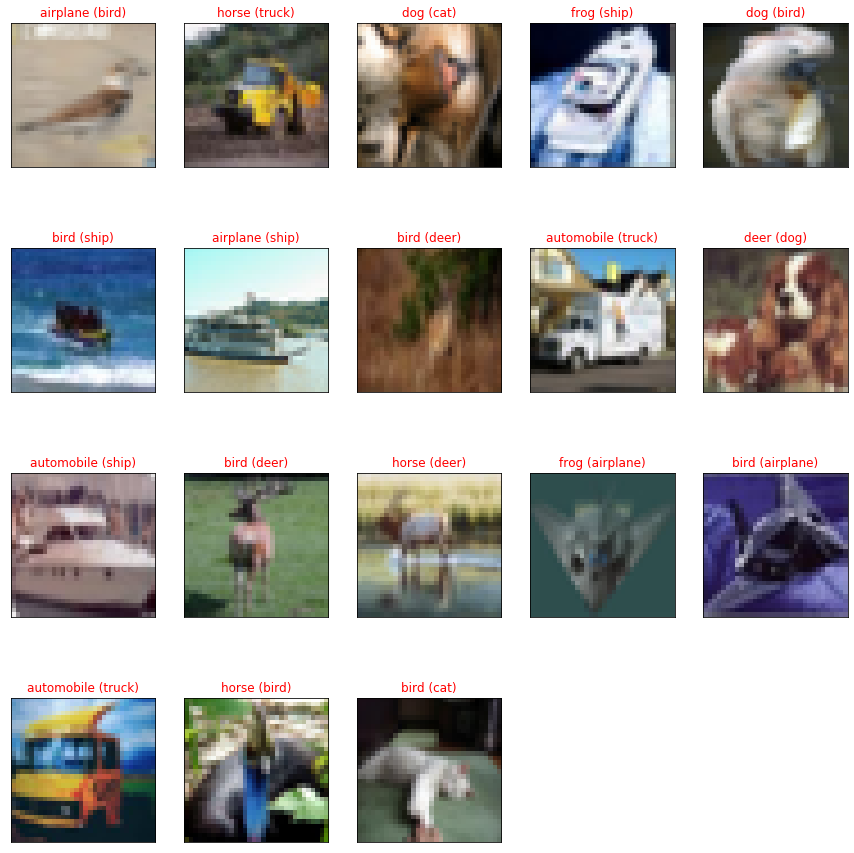

In [15]:
# obtain one batch of test images
dataiterator = iter(test_loader)
plotdata.PlotData.plotmisclassifiedimages(dataiterator=dataiterator,model=cnn_model,classes=classes)

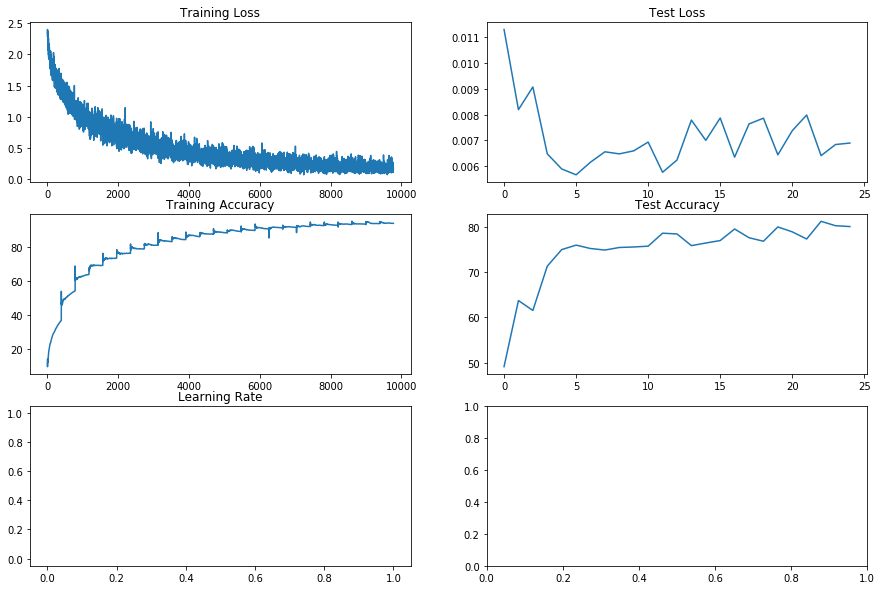

In [16]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
plotdata.PlotData.plottesttraingraph(train_losses=train_losses,train_acc=train_acc,test_losses=test_losses,
                                     test_acc=test_acc,lr_data=lr_data)

In [17]:
utils.Utils.savemodel(model=cnn_model,epoch=epochs,path="savedmodels/finalmodelwithdata.pt",optimizer_state_dict=optimizer.state_dict
                      ,train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses)